# Kollokasjoner for nøkkelord

In [223]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle
import pandas as pd
import networkx as nx

In [2]:
css()

In [66]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [150]:
reference = nb.frame(nb.totals(250000), 'tot')

In [11]:
keyword = 'abort'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

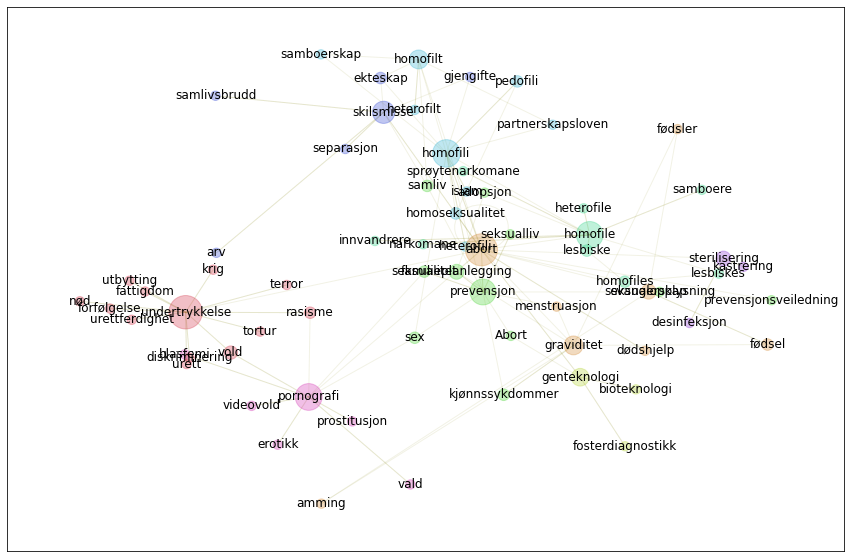

In [15]:
gnl.show_graph(keyword_graph, spread=1.2, fontsize=12)

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [16]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### genteknologi-bioteknologi
<span style='font-size:1.1em'>genteknologi, bioteknologi, fosterdiagnostikk</span>
### prevensjon-familieplanlegging
<span style='font-size:1.1em'>prevensjon, familieplanlegging, kjønnssykdommer, seksualitet, samliv, sex, prevensjonsveiledning, seksualliv, Abort, seksualopplysning, adopsjon</span>
### homofile-lesbiske
<span style='font-size:1.1em'>homofile, lesbiske, homofiles, samboere, narkomane, sprøytenarkomane, innvandrere, lesbiskes, heterofile</span>
### homofili-homofilt
<span style='font-size:1.1em'>homofili, homofilt, pedofili, homoseksualitet, islam, heterofili, partnerskapsloven, heterofilt, samboerskap</span>
### skilsmisse-ekteskap
<span style='font-size:1.1em'>skilsmisse, ekteskap, gjengifte, separasjon, samlivsbrudd, arv</span>
### sterilisering-kastrering
<span style='font-size:1.1em'>sterilisering, kastrering, desinfeksjon</span>
### pornografi-prostitusjon
<span style='font-size:1.1em'>pornografi, prostitusjon, blasfemi, videovold, erotikk, vald</span>
### undertrykkelse-vold
<span style='font-size:1.1em'>undertrykkelse, vold, rasisme, urett, diskriminering, utbytting, terror, tortur, fattigdom, urettferdighet, forfølgelse, nød, krig</span>
### abort-graviditet
<span style='font-size:1.1em'>abort, graviditet, svangerskap, fødsel, amming, fødsler, dødshjelp, menstruasjon</span>


In [17]:
gnl.show_cliques(keyword_graph)

(3, 1) ekteskap, pedofili, familieplanlegging, graviditet, homofili, partnerskapsloven, prevensjon, abort, homofilt, homofile, homoseksualitet, samboerskap, sex



# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


In [18]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

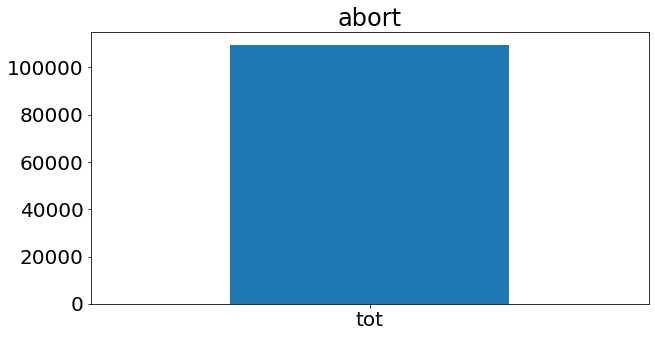

In [19]:
barchart(keyword, reference);

In [26]:
keyword

'abort'

In [28]:
nb.collocation('abort', yearfrom = 1950, yearto = 1960, corpus = 'avis')

,0
!,13
"""",4
#,1
&,2
',19
...,...
—,17
„,1
•,6
■,7


In [82]:
from time import time

collocations = dict()
step = 5
doctype = 'avis'
for i in range(1950, 2000, step):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom = i, yearto = i + step, before = 10, after = 10, corpus = doctype)
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom= i, yearto= i + step, before = 10, after = 10, corpus = doctype)
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.007557634512583415 minutter
1955
0.01073919932047526 minutter
1960
0.012120107809702555 minutter
1965
0.014468284447987874 minutter
1970
0.1537492275238037 minutter
1975
0.2310629645983378 minutter
1980
0.20614619652430216 minutter
1985
0.09554800987243653 minutter
1990
0.3024860938390096 minutter
1995
0.582119619846344 minutter


In [83]:
colls = nb.frame(collocations)

In [84]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [32]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [85]:
agg = colls

In [86]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

# Sammenligner med en referanse


In [111]:
reference.sort_values(by=reference.columns[0], ascending=False)[:10].style.background_gradient()

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


In [200]:
reference.loc['og']

tot    0.023814
Name: og, dtype: float64

In [151]:
nb.normalize_corpus_dataframe(reference)

True

<AxesSubplot:>

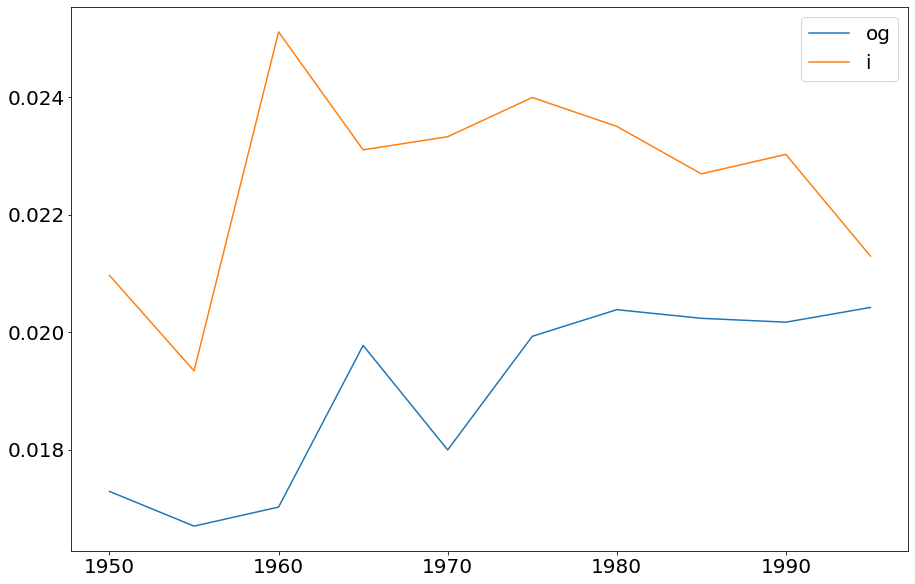

In [204]:
agg.loc[['og','i']].transpose().plot()

In [182]:
agg.sort_values(by=agg.columns[0], ascending=False)[:10].style.format("{0:,.3f}").background_gradient()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
.,0.053,0.047,0.044,0.046,0.048,0.048,0.049,0.052,0.053,0.052
",",0.037,0.035,0.032,0.034,0.029,0.031,0.033,0.033,0.034,0.035
i,0.021,0.019,0.025,0.023,0.023,0.024,0.024,0.023,0.023,0.021
en,0.018,0.021,0.014,0.016,0.013,0.012,0.012,0.013,0.013,0.012
og,0.017,0.017,0.017,0.020,0.018,0.020,0.020,0.020,0.020,0.020
er,0.017,0.016,0.015,0.017,0.019,0.019,0.021,0.020,0.020,0.020
det,0.016,0.018,0.018,0.016,0.016,0.015,0.015,0.013,0.013,0.012
at,0.016,0.016,0.019,0.015,0.015,0.016,0.016,0.015,0.014,0.014
som,0.016,0.018,0.018,0.019,0.017,0.018,0.018,0.018,0.018,0.018
av,0.015,0.014,0.012,0.012,0.012,0.012,0.012,0.012,0.011,0.011


In [185]:
hiwords = agg.sort_values(by=agg.columns[0], ascending=False)[:10].index

In [186]:
hiwords

Index(['.', ',', 'i', 'en', 'og', 'er', 'det', 'at', 'som', 'av'], dtype='object')

pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference['tot']],axis=1).mean(axis=1))

In [152]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]/reference['tot']

In [90]:
#nb.normalize_corpus_dataframe(pmi)

True

In [187]:
pmi.loc[hiwords].sort_values(by=agg.columns[0], ascending=True)[:10].style.format("{0:,.3f}").background_gradient()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
og,0.726,0.701,0.715,0.830,0.756,0.837,0.856,0.850,0.847,0.858
",",0.762,0.715,0.669,0.703,0.607,0.646,0.684,0.686,0.710,0.724
.,0.952,0.848,0.797,0.824,0.864,0.866,0.886,0.941,0.964,0.937
i,1.040,0.959,1.245,1.145,1.157,1.190,1.165,1.125,1.142,1.056
som,1.350,1.561,1.573,1.670,1.431,1.527,1.572,1.554,1.580,1.570
det,1.361,1.467,1.485,1.347,1.294,1.251,1.281,1.070,1.064,0.988
av,1.495,1.339,1.167,1.195,1.166,1.147,1.189,1.116,1.078,1.093
er,1.578,1.435,1.344,1.540,1.743,1.762,1.894,1.864,1.791,1.800
at,1.793,1.854,2.145,1.755,1.755,1.821,1.884,1.661,1.609,1.623
en,1.810,2.028,1.339,1.578,1.306,1.229,1.213,1.322,1.249,1.188


In [91]:
pmi.to_csv(filename)

In [92]:
pmi = pd.read_csv(filename, index_col=0)

In [123]:
pmi

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
!,0.359595,0.605291,0.651474,0.471019,0.741324,0.795245,0.647507,0.427567,0.440365,0.502039
"""",0.105624,0.237056,0.245693,0.380469,0.221827,0.183851,0.082297,0.135679,0.146301,0.180784
#,2.441674,0.513746,0.000000,0.133260,0.361970,0.713626,0.398184,0.476424,0.888702,2.882678
$,0.000000,0.428134,0.819201,0.111054,0.339357,0.079294,0.055305,0.248145,0.092576,0.038132
%,0.316396,0.199716,0.254760,0.362630,0.334195,0.357561,0.197790,0.246943,0.211126,0.237169
...,...,...,...,...,...,...,...,...,...,...
★,25.235289,0.000000,0.000000,2.754556,4.676306,11.800789,0.000000,0.000000,2.296237,1.891630
♦,4.011897,3.376529,0.000000,2.846469,1.040812,0.469021,0.327127,0.097851,0.000000,0.225548
✓,0.000000,0.000000,8.395119,3.414212,1.159236,0.000000,0.000000,0.000000,0.000000,0.000000
❖,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [192]:
def show_matrix(df, column=0, top = 23):
    print(f"showing {df.columns[column]}")
    return df.sort_values(by=pmi.columns[column], ascending=False).head(top).fillna(0).round(0).style.format("{0:,.0f}").background_gradient(axis=0)


In [193]:
show_matrix(pmi,0, 25)

showing 1950


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
arvemessige,"5,018","2,112",673,0,217,261,136,41,0,31
Obduksjonen,"3,775",0,0,0,0,0,0,0,0,0
provocatus,"2,974","1,877","1,597",568,551,290,243,73,135,167
innlater,"2,847",0,0,0,0,0,0,0,0,0
NKN,"2,352",0,0,513,58,0,85,0,0,0
blodskam,"2,237",471,300,153,62,174,76,41,17,21
2331,"2,115",0,0,0,0,0,0,0,0,0
presidium,"2,036",0,0,0,0,0,0,0,0,0
Svangerskapet,"1,957",824,"1,576",71,0,0,0,64,20,49
fødselskontroll,"1,907",803,341,"1,527",141,74,242,186,251,167


In [194]:
show_matrix(pmi, 1, 25)

showing 1955


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
indikasjoner,802,"2,237","1,077",336,221,266,73,51,21,31
arvemessige,"5,018","2,112",673,0,217,261,136,41,0,31
provocatus,"2,974","1,877","1,597",568,551,290,243,73,135,167
Truselen,0,"1,427",0,0,50,0,0,0,21,0
sjeleleg,0,"1,372",875,0,0,0,0,0,0,0
Svangerskap,0,"1,367",0,0,10,11,15,0,33,10
svangerskapets,"1,610","1,355",972,307,731,345,328,471,256,241
Straffelovrådet,0,"1,341",0,0,0,0,0,0,0,0
lovvedtaket,0,"1,306",833,0,0,60,42,0,0,0
legalisering,879,"1,110",118,576,228,257,382,429,347,330


In [195]:
show_matrix(pmi, 2, 25)

showing 1960


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
Fruktbarhet,0,0,"2,766",0,0,0,0,0,0,0
fremmedloven,0,0,"2,724",0,0,0,0,0,0,0
fosterskader,0,0,"2,121",0,0,132,399,413,291,529
preventiver,0,342,"1,963",444,422,158,309,119,123,152
Helsemyndighetene,0,0,"1,915",312,0,28,0,0,0,0
ufruktbarhet,0,0,"1,688",158,36,0,0,0,44,36
provocatus,"2,974","1,877","1,597",568,551,290,243,73,135,167
Spontan,0,0,"1,585",99,67,18,74,22,14,51
Svangerskapet,"1,957",824,"1,576",71,0,0,0,64,20,49
ansøkninger,"1,014",427,"1,497",498,132,40,28,0,0,0


In [196]:
show_matrix(pmi, 3, 25)

showing 1965


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
legalisert,403,"1,018",757,"1,892",209,204,460,295,245,136
abortspørsmålet,0,0,0,"1,737","1,832","1,959","1,913",899,610,471
fødselskontroll,"1,907",803,341,"1,527",141,74,242,186,251,167
pft,0,566,"1,265","1,396",374,682,"1,098",492,0,25
programfestet,0,0,0,"1,266","2,149","2,153",853,299,124,153
styringsverk,0,0,0,"1,093",0,0,0,0,0,0
22.30,0,0,0,980,48,40,126,13,0,0
programpost,0,0,0,971,559,241,42,0,0,0
barnebegrensning,612,773,164,868,159,95,67,149,74,23
nødløsning,0,0,0,791,549,962,447,225,150,148


In [197]:
show_matrix(pmi, 4, 25)


showing 1970


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
selvbestemt,0,0,0,67,"24,733","31,405","22,972","12,638","11,402","13,630"
Folkeaksjonen,0,0,0,0,"6,646","14,800","5,976","1,434","1,409","1,498"
programfestet,0,0,0,"1,266","2,149","2,153",853,299,124,153
abortspørsmålet,0,0,0,"1,737","1,832","1,959","1,913",899,610,471
Kvinnefronten,0,0,0,0,"1,742","2,033",332,642,670,"1,145"
Tungesvik,0,0,0,69,"1,659","2,211",308,123,96,283
Hauglin,0,0,0,0,"1,639","2,130",167,60,19,0
prevensjonsveiledning,0,0,0,177,"1,413","1,866",397,356,271,821
abortloven,"1,083",152,872,709,"1,218","2,040","1,315","2,043","1,544","1,299"
Valgforbund,0,0,0,0,"1,193",376,0,0,0,0


In [198]:
show_matrix(pmi, 5, 25)


showing 1975


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
selvbestemt,0,0,0,67,"24,733","31,405","22,972","12,638","11,402","13,630"
Folkeaksjonen,0,0,0,0,"6,646","14,800","5,976","1,434","1,409","1,498"
Tungesvik,0,0,0,69,"1,659","2,211",308,123,96,283
programfestet,0,0,0,"1,266","2,149","2,153",853,299,124,153
Hauglin,0,0,0,0,"1,639","2,130",167,60,19,0
abortloven,"1,083",152,872,709,"1,218","2,040","1,315","2,043","1,544","1,299"
Kvinnefronten,0,0,0,0,"1,742","2,033",332,642,670,"1,145"
abortspørsmålet,0,0,0,"1,737","1,832","1,959","1,913",899,610,471
stortingsperiode,0,0,0,87,206,"1,891",303,39,24,60
prevensjonsveiledning,0,0,0,177,"1,413","1,866",397,356,271,821


In [165]:
pmi.sort_values(by=pmi.columns[6], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
selvbestemt,0.000000,0.000000,0.000000,67.013039,24732.618561,31404.503353,22971.534613,12637.889466,11402.263022,13629.501589
Folkeaksjonen,0.000000,0.000000,0.000000,0.000000,6645.719211,14800.336293,5976.327759,1433.948979,1408.743216,1498.388072
abortspørsmålet,0.000000,0.000000,0.000000,1737.305956,1831.706803,1958.628701,1912.510770,898.976158,609.786473,470.943115
Hoyre,0.000000,0.000000,0.000000,166.627919,452.604633,594.875284,1701.114403,37.232359,0.000000,114.427985
Kr.F,0.000000,100.911705,64.362155,104.701816,275.509867,588.725612,1577.289768,198.859311,72.734099,134.815544
Folkepartis,0.000000,580.460140,370.221330,391.469949,368.077115,634.286173,1424.657843,269.145955,167.351230,124.076864
abortloven,1083.041613,151.919864,872.059480,709.315986,1217.558603,2039.921244,1314.843115,2042.810196,1543.939193,1298.951574
pft,0.000000,566.474069,1264.553225,1395.906465,374.175386,681.952650,1097.629735,492.489257,0.000000,25.226512
AAN,0.000000,0.000000,0.000000,0.000000,0.000000,96.197438,1028.783100,5218.073973,9084.673311,11441.750907
programfestet,0.000000,0.000000,0.000000,1265.632971,2148.617078,2152.890957,852.743831,299.436097,124.123481,153.378538


In [166]:
pmi.sort_values(by=pmi.columns[7], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
selvbestemt,0.000000,0.000000,0.000000,67.013039,24732.618561,31404.503353,22971.534613,12637.889466,11402.263022,13629.501589
AAN,0.000000,0.000000,0.000000,0.000000,0.000000,96.197438,1028.783100,5218.073973,9084.673311,11441.750907
abortloven,1083.041613,151.919864,872.059480,709.315986,1217.558603,2039.921244,1314.843115,2042.810196,1543.939193,1298.951574
Skippergt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1876.543245,157.070391,0.000000
Folkeaksjonen,0.000000,0.000000,0.000000,0.000000,6645.719211,14800.336293,5976.327759,1433.948979,1408.743216,1498.388072
Ofring,0.000000,0.000000,0.000000,0.000000,0.000000,391.978082,351.503774,1226.666263,1590.824564,727.066008
svangerskapsuke,0.000000,0.000000,0.000000,119.007250,474.780118,934.704332,237.063833,1063.668259,1661.702685,2451.766767
abortinngrep,0.000000,266.235802,169.806961,69.058817,422.058722,1331.346347,481.480898,1049.302813,997.852421,497.958230
22.10,0.000000,0.000000,0.000000,0.000000,41.509762,14.548757,60.883680,1019.855303,22.647568,55.970891
Nessa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.483407,997.346502,977.388659,649.687550


In [167]:
pmi.sort_values(by=pmi.columns[8], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
selvbestemt,0.000000,0.000000,0.000000,67.013039,24732.618561,31404.503353,22971.534613,12637.889466,11402.263022,13629.501589
AAN,0.000000,0.000000,0.000000,0.000000,0.000000,96.197438,1028.783100,5218.073973,9084.673311,11441.750907
svangerskapsuke,0.000000,0.000000,0.000000,119.007250,474.780118,934.704332,237.063833,1063.668259,1661.702685,2451.766767
Ofring,0.000000,0.000000,0.000000,0.000000,0.000000,391.978082,351.503774,1226.666263,1590.824564,727.066008
abortloven,1083.041613,151.919864,872.059480,709.315986,1217.558603,2039.921244,1314.843115,2042.810196,1543.939193,1298.951574
Folkeaksjonen,0.000000,0.000000,0.000000,0.000000,6645.719211,14800.336293,5976.327759,1433.948979,1408.743216,1498.388072
3015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1402.409833,478.054692
prevensjonsmiddel,0.000000,0.000000,0.000000,54.253305,865.775510,1278.345631,729.494220,945.569798,1025.130014,1210.860303
Nattverd,0.000000,0.000000,0.000000,0.000000,22.204216,256.817752,488.514377,672.178814,999.449201,696.097987
abortinngrep,0.000000,266.235802,169.806961,69.058817,422.058722,1331.346347,481.480898,1049.302813,997.852421,497.958230


In [168]:
pmi.sort_values(by=pmi.columns[9], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
selvbestemt,0.000000,0.000000,0.000000,67.013039,24732.618561,31404.503353,22971.534613,12637.889466,11402.263022,13629.501589
AAN,0.000000,0.000000,0.000000,0.000000,0.000000,96.197438,1028.783100,5218.073973,9084.673311,11441.750907
GRATIS,0.000000,0.000000,0.000000,0.000000,0.000000,18.458083,25.747812,0.000000,43.099629,2520.874748
svangerskapsuke,0.000000,0.000000,0.000000,119.007250,474.780118,934.704332,237.063833,1063.668259,1661.702685,2451.766767
Folkeaksjonen,0.000000,0.000000,0.000000,0.000000,6645.719211,14800.336293,5976.327759,1433.948979,1408.743216,1498.388072
abortloven,1083.041613,151.919864,872.059480,709.315986,1217.558603,2039.921244,1314.843115,2042.810196,1543.939193,1298.951574
prevensjonsmiddel,0.000000,0.000000,0.000000,54.253305,865.775510,1278.345631,729.494220,945.569798,1025.130014,1210.860303
Saugstad,0.000000,0.000000,0.000000,0.000000,0.000000,59.173878,0.000000,29.628840,36.845606,1172.393987
Kvinnefronten,0.000000,0.000000,0.000000,0.000000,1741.737261,2032.836915,332.105943,641.892380,669.951091,1144.904456
Lahnstein,0.000000,0.000000,0.000000,0.000000,0.000000,272.449769,268.270244,381.167403,898.122756,1094.390214


<br>
<br>

# Graf over årene

In [212]:
words = []
for i,_ in enumerate(pmi):
    words += list(pmi.sort_values(by = pmi.columns[i], ascending = False)[:200].index)
    

In [214]:
len(set(words))

1176

In [218]:
pmi_w = pmi.loc[set(words)]

In [252]:
agg_w = agg.loc[set(words)]

In [253]:
agg_dot_year = agg_w.transpose().dot(agg_w)

In [216]:
pmi_dot = pmi.loc[set(words)].dot(pmi.loc[set(words)].transpose())

In [219]:
pmi_dot_year = pmi_w.transpose().dot(pmi_w)

In [220]:
pmi_dot_year

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
1950,1.529298e+08,3.762820e+07,2.503389e+07,1.588659e+07,1.147628e+07,1.029823e+07,8.072485e+06,8.053317e+06,7.324395e+06,7.024411e+06
1955,3.762820e+07,6.090352e+07,2.591719e+07,1.273906e+07,8.986585e+06,8.018814e+06,7.443715e+06,5.936256e+06,5.089537e+06,4.717582e+06
1960,2.503389e+07,2.591719e+07,7.424371e+07,1.523142e+07,9.639335e+06,9.576346e+06,9.570997e+06,8.080152e+06,6.893836e+06,6.866313e+06
1965,1.588659e+07,1.273906e+07,1.523142e+07,3.387198e+07,1.986352e+07,2.006921e+07,1.661357e+07,1.140101e+07,9.904786e+06,8.985959e+06
1970,1.147628e+07,8.986585e+06,9.639335e+06,1.986352e+07,6.933181e+08,9.135695e+08,6.269002e+08,3.370749e+08,3.042406e+08,3.613796e+08
1975,1.029823e+07,8.018814e+06,9.576346e+06,2.006921e+07,9.135695e+08,1.262121e+09,8.357405e+08,4.389032e+08,3.978550e+08,4.711432e+08
1980,8.072485e+06,7.443715e+06,9.570997e+06,1.661357e+07,6.269002e+08,8.357405e+08,5.930032e+08,3.206055e+08,2.936985e+08,3.472794e+08
1985,8.053317e+06,5.936256e+06,8.080152e+06,1.140101e+07,3.370749e+08,4.389032e+08,3.206055e+08,2.180081e+08,2.147000e+08,2.530625e+08
1990,7.324395e+06,5.089537e+06,6.893836e+06,9.904786e+06,3.042406e+08,3.978550e+08,2.936985e+08,2.147000e+08,2.456069e+08,2.859987e+08
1995,7.024411e+06,4.717582e+06,6.866313e+06,8.985959e+06,3.613796e+08,4.711432e+08,3.472794e+08,2.530625e+08,2.859987e+08,3.575187e+08


In [217]:
pmi_dot

,sinnssykdommer,helsemyndighetene,boligmangel,hustruene,abortspørsmålet,vårsesjonen,oket,14.02,Sjøgata,distriktslægen,...,isolatet,regjeringas,Conny,Bøhle,lovforslaget,kvinneundertrykking,KrF,prenatal,byutvidelse,ekonomi
sinnssykdommer,346165.567313,39760.240493,166974.651120,480633.362843,0.000000e+00,0.000000,268826.306754,0.000000,0.000000,249024.664139,...,198614.022046,0.000000,0.000000,0.000000,3.418299e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
helsemyndighetene,39760.240493,131842.494367,19178.546082,55358.612052,1.793135e+05,2408.848038,81563.623413,0.000000,25446.827792,28602.730802,...,97053.491290,2446.863261,0.000000,829.985003,1.201543e+05,8.282229e+03,17978.250573,4364.465813,0.000000,34383.829603
boligmangel,166974.651120,19178.546082,80541.038015,231835.848667,0.000000e+00,0.000000,129669.681276,0.000000,0.000000,120118.262303,...,95802.443022,0.000000,0.000000,0.000000,1.648833e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
hustruene,480633.362843,55358.612052,231835.848667,667644.410292,3.363638e+04,0.000000,373770.742179,0.000000,0.000000,345758.137313,...,275765.513204,769.348327,0.000000,0.000000,4.749435e+05,1.949067e+03,3209.051564,1819.250026,0.000000,0.000000
abortspørsmålet,0.000000,179313.503358,0.000000,33636.375327,1.526909e+07,746486.421386,114012.835691,105016.814082,207318.787370,0.000000,...,0.000000,725330.904735,0.000000,255437.830148,1.455668e+06,1.804042e+06,668327.953079,376761.147410,0.000000,224195.668958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kvinneundertrykking,0.000000,8282.228569,0.000000,1949.066899,1.804042e+06,126822.747890,11900.711647,0.000000,8973.481175,0.000000,...,0.000000,153100.684381,0.000000,3512.196424,3.057521e+05,6.044416e+05,42495.922325,16445.902850,0.000000,12124.994526
KrF,0.000000,17978.250573,0.000000,3209.051564,6.683280e+05,3502.223206,5635.799905,17533.329447,75473.945311,0.000000,...,0.000000,11637.691114,0.000000,542.125733,2.422571e+04,4.249592e+04,101609.186749,43907.645969,0.000000,92642.011499
prenatal,0.000000,4364.465813,0.000000,1819.250026,3.767611e+05,4822.751849,3458.028400,7099.897057,9977.916272,0.000000,...,0.000000,7529.586456,0.000000,2809.943909,1.174125e+04,1.644590e+04,43907.645969,27463.692394,0.000000,9700.640396
byutvidelse,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,434815.963556,0.000000,0.000000,0.000000,...,0.000000,0.000000,214784.829735,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,641494.056691,0.000000


In [221]:
import pandas as pd

In [256]:
graph_dot = nx.from_pandas_adjacency(pmi_dot)

In [226]:
graph = nx.from_pandas_adjacency(pmi_dot_year)

In [254]:
graph_agg = nx.from_pandas_adjacency(agg_dot_year)

In [229]:
graph.nodes()

NodeView((1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995))

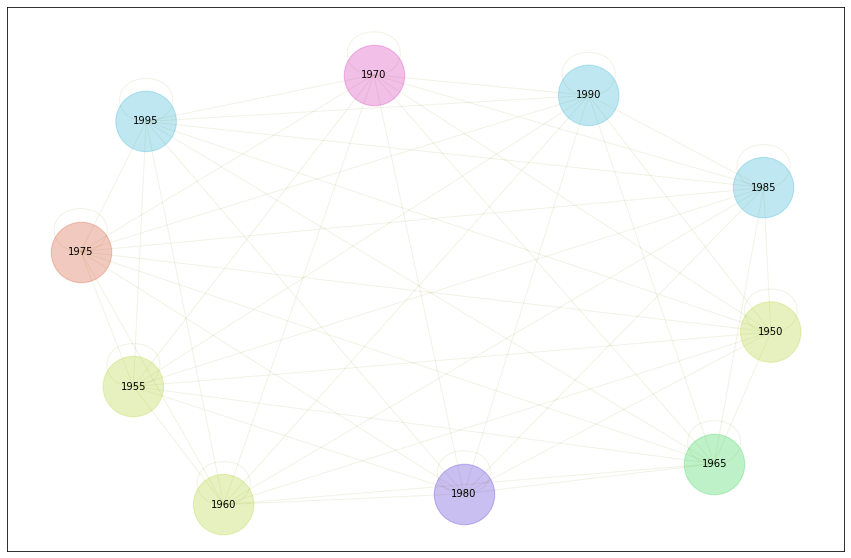

In [255]:
gnl.show_graph(graph_agg)

In [257]:
show_communities(graph_dot)

ufødte-gravid :  ufødte, gravid, prevensjon, abort, Abort, fosteret, provosert, gravide, graviditet, prevensjonsmidler, foster, homoseksualitet, fostre, seksualundervisning, kirurgisk, overveier, dødshjelp, familieplanlegging, totalforbud, medmenneskelig, høyesterett, Søndagsskole, Vatikanets, menneskeverdet, merkesaker, krenker, Alternativ, reserverer, graviditeten, svangerskapsuke, Kvinneklinikken, Tilhengere, menneskeverd, unnfangelsen, klinikker, pillen, eutanasi, barnefaren, gynekologiske, Kveldsnytt, 22.05, p-pillen, ombestemmer, Høybråten, 11.00, ettervirkninger, abortert, lørdagens, menneskerettighet, Sendt, p-piller, hjertesaker, talskvinne, Eire, Nattverd, incest, 22.10, nevnd, kvinnespørsmål, kvinnebevegelse, partiprogrammet, Gravide, verdispørsmål, fostrene, kampsak, fosterdiagnostikk, 22.00, kristendomsundervisning, 19.30, homofili, KrF, demonstranter, Samtale, LØRDAG, 15.30, privatisere, prenatal, hippokratiske, okonomi, AUFs, 21.10, spontanabort, sterilisert, WASHINGTON,

In [258]:
gnl.show_cliques(graph_dot)

KeyboardInterrupt: 

In [250]:
from collections import Counter
def community_dict(G):
    sorter = Counter(dict(nx.degree(G)))
    cd = {}
    for c in gnl.mcommunity(G):
        l = [(x, sorter[x]) for x in c if sorter[x] > 0]
        # print(l)
        l.sort(key=lambda i: i[1], reverse=True)
        # print(l)
        cd['-'.join([str(x[0]) for x in l[:2]])] = [x[0] for x in l]
    return cd

def show_communities(G):
    Gc = community_dict(G)
    for c, value in Gc.items():
        print(str(c), ': ', ', '.join([str(v) for v in value]))
        print()

In [149]:
nb.concordance(word="Programpost", corpus='avis', yearfrom='1980', yearto='1985', size=1)

aftenposten-19850509,Et nytt borgerlig parti KONTAKTPARTIET,Programpost,"2 , Innvandringsloven . Formuleringen"
aftenposten-19850514,annonser fra det borgelige KONTAKTPARTIET,Programpost,"2. Forelobig bare formålsparagrafen ,"
aftenposten-19831215,"Knudsen , dosent , Oslo",Programpost,karakterer Hr. redaktør . Javisst
bergenstidende-19850218,? . Vassrett : 1.,Programpost,i Fjernsynet 10. Tidsrom 11.


In [53]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(50).index

Index(['selvbestemt', 'sjølbestemt', 'Folkeaksjonen', 'AAN', 'abortloven',
       'aborter', 'Øog', 'ufødte', 'Kr.F', 'sjølvbestemt', 'Abort',
       'svangerskapsuke', 'abortlov', 'Nessa', 'Folkepartis',
       'svangerskapsavbrudd', 'Selvbestemt', 'fosterets', 'abortsaken',
       'prevensjonsmiddel', 'høyesterett', 'abortspørsmålet',
       'regjeringssamarbeid', '22.10', 'fosterdrap', 'Folkebevegelsen',
       'abortinngrep', 'homoseksualitet', 'Ofring', '21.00', 'pornografi',
       'Kirkemøtet', 'Nattverd', 'homofili', 'menneskeverdet', 'sjølvvald',
       'Hercz', 'dødshjelp', 'pft', 'Kvinnefronten', 'nødløsning',
       'abortsøkende', 'aborttallene', 'Korvald', '20.45', 'Senterpartiets',
       'sterilisering', 'innvilges', 'svangerskapets', 'barnefaren'],
      dtype='object')

In [54]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(50).index

Index(['Øog', 'aborter', 'eugeniske', 'kjennskapet', 'Dahlseng', 'sterilitet',
       'sterilisering', 'blodskam', 'Svangerskap', 'arvemessige',
       'svangerskapets', 'spirende', 'framkalle', 'innlater', 'provocatus',
       'Munkebye', 'Indikasjoner', 'framkalt', 'svangre', 'brennaktuelle',
       'velgjerning', 'Straffelovrådet', 'besvangring', 'prinsipale', 'Lovlig',
       'Tande', 'pA', 'fullføres', 'abortene', 'sjeleleg', 'kvaksalvere',
       'Margareth', 'mislykte', 'nødutvei', 'aborten', 'hustruene', 'ufødte',
       'barnerente', 'fødselskontroll', 'kjønnssykdommer', 'Blakely',
       'legalisering', 'sykestue', 'legalisert', 'Aborter', 'påbegynte',
       'Furuhjelm', 'oket', 'krenkt', 'kurator'],
      dtype='object')

In [38]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(50).index

Index(['Abortus', 'abortus', 'aborter', 'provocatus', 'framkalt', 'Abort',
       'habituell', 'svangerskapsavbrytelse', 'abortere', 'Truende', 'Illegal',
       'Habituell', 'Framkalt', 'aborten', 'fosterfordrivelse', 'Spontan',
       'Kunstig', 'framkalle', 'barnemord', 'Kriminell', 'sterilisering',
       'abortion', 'barselseng', 'sterilisasjon', 'sterilitet', 'abonnent',
       'barselfeber', 'Barselfeber', 'puerperalis', 'Fosteret', 'lovstridig',
       'blodforgiftning', 'febrilis', 'misfoster', 'Fødselskontroll',
       'blødningen', 'Fosterfordrivelse', 'innvilges', 'abonnere',
       'avbrytelse', 'Fremkalt', 'couche', 'incipiens',
       'Svangerskapsavbrytelse', 'aborterer', 'incompletus', 'legalis',
       'ABORT', 'utstøtning', 'pessar'],
      dtype='object')

# Assosiasjoner og variasjon over år.

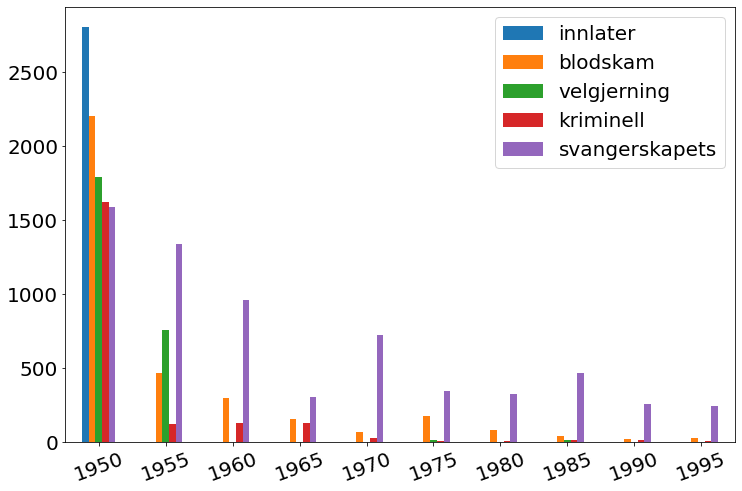

In [138]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [56]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

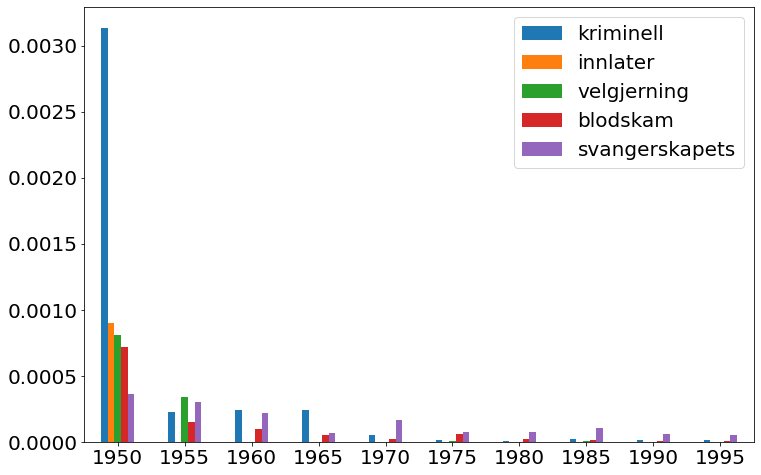

In [139]:
freq_assoc_val(agg, pmi, 0)

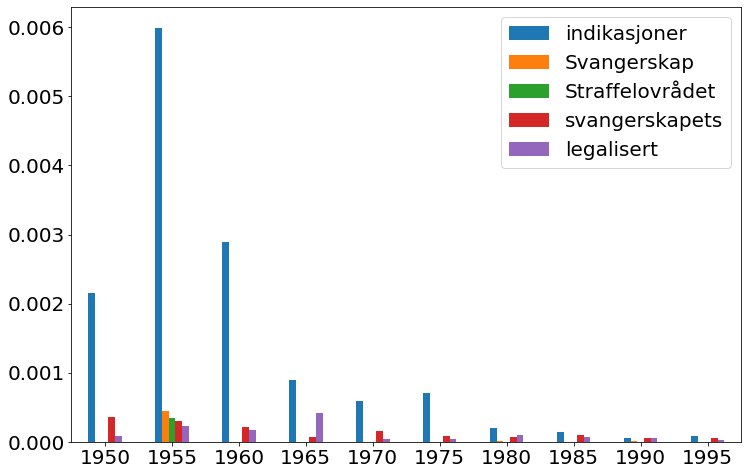

In [140]:
freq_assoc_val(agg, pmi, 1)

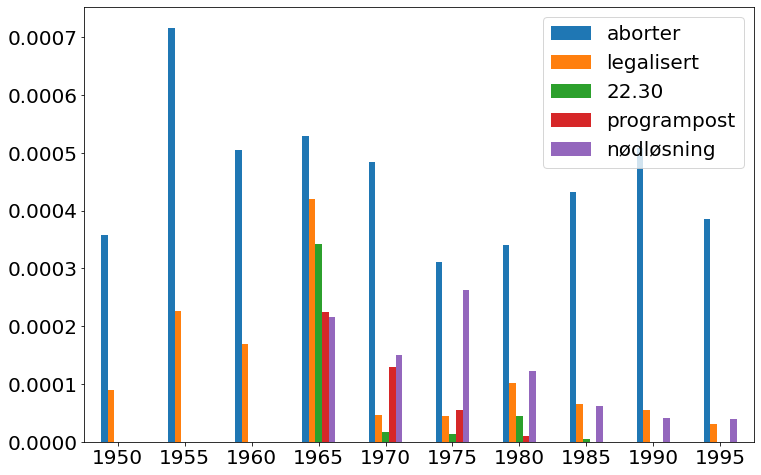

In [141]:
freq_assoc_val(agg, pmi, 3)

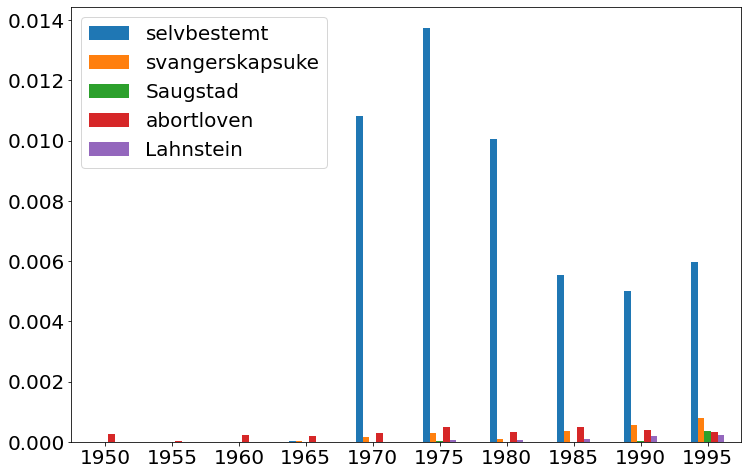

In [143]:
freq_assoc_val(agg, pmi, 9)

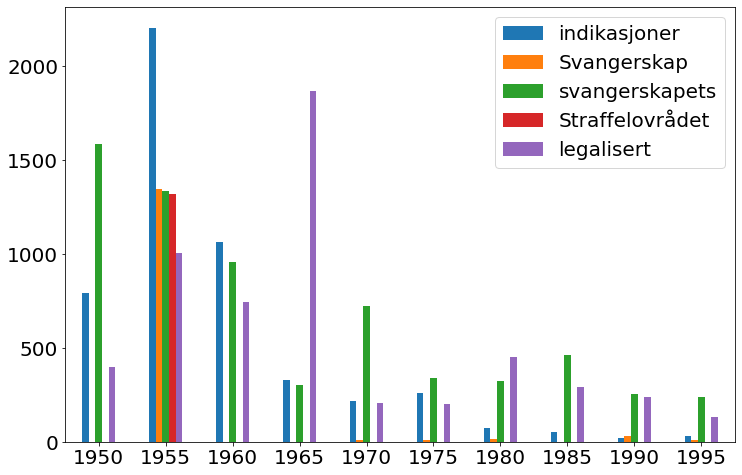

In [144]:
freq_assoc_val(pmi, pmi, 1)

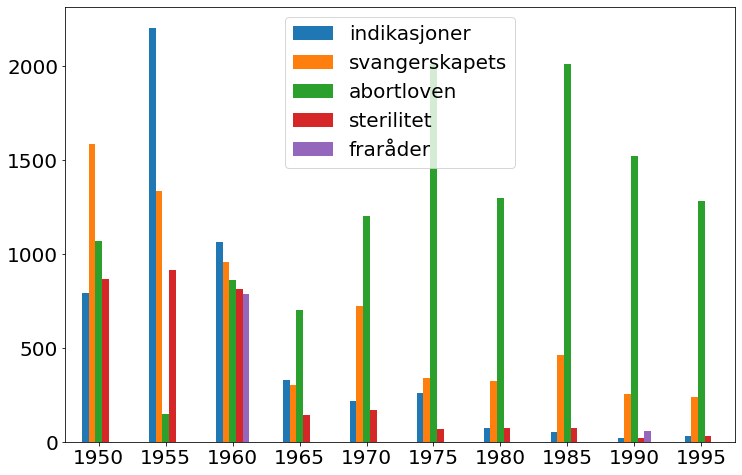

In [145]:
freq_assoc_val(pmi, pmi, 2)

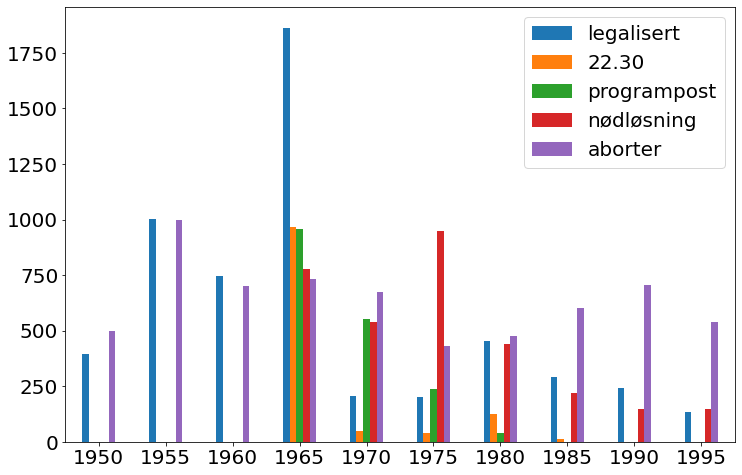

In [146]:
freq_assoc_val(pmi, pmi, 3)

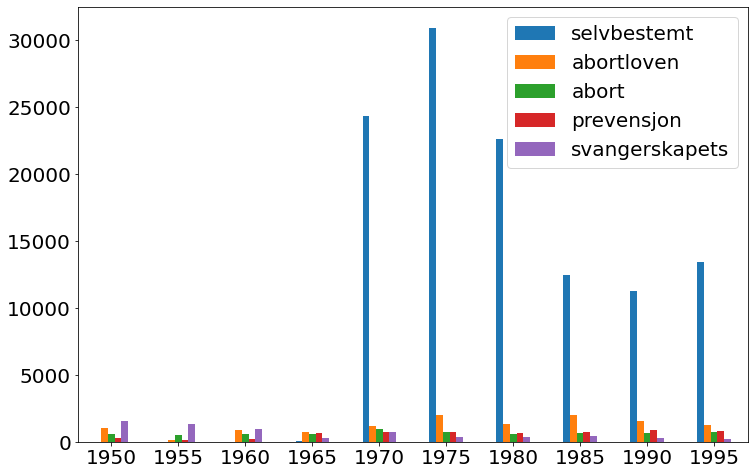

In [147]:
freq_assoc_val(pmi, pmi, 4)

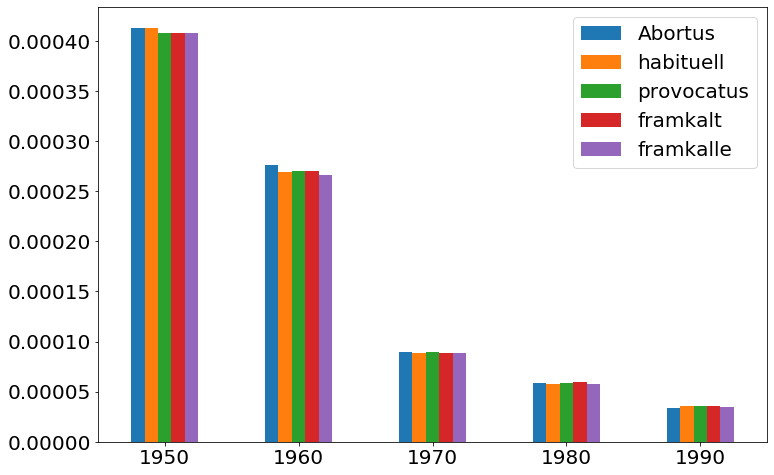

In [49]:
freq_assoc_val(pmi, pmi, 0)

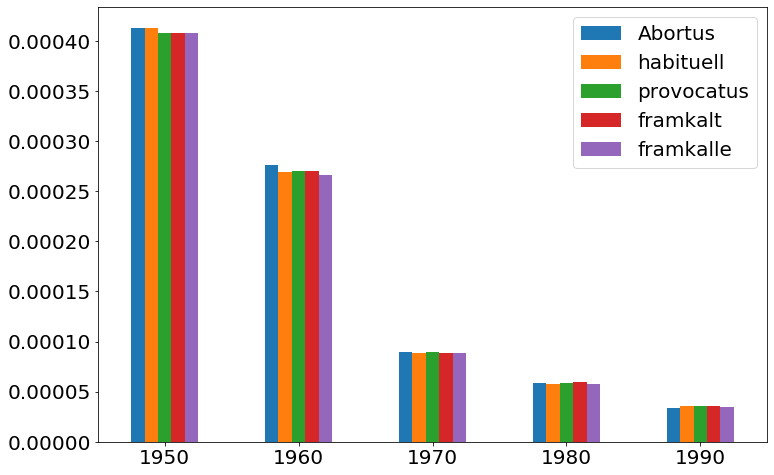

In [50]:
freq_assoc_val(pmi, pmi, 0)

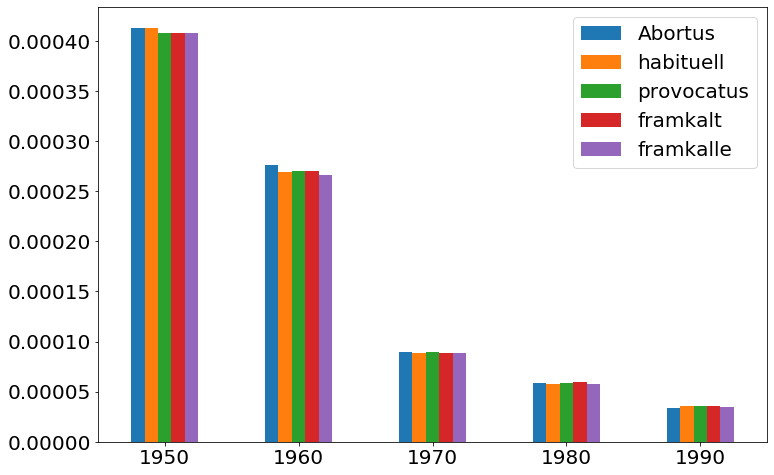

In [51]:
freq_assoc_val(pmi, pmi, 0)

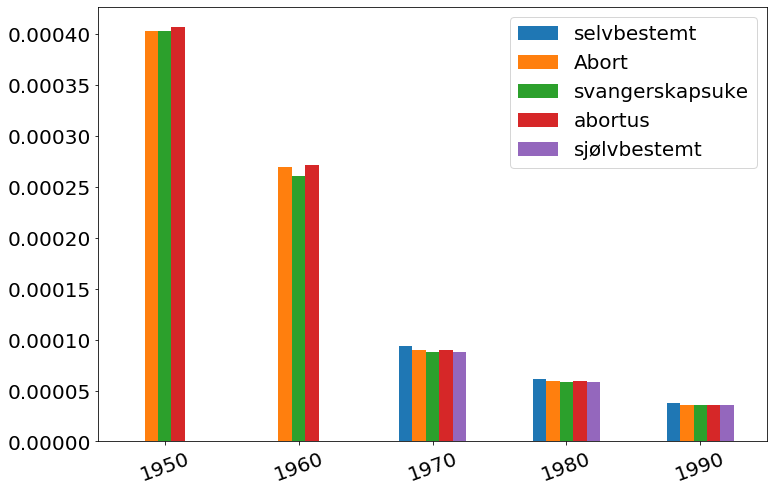

In [52]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

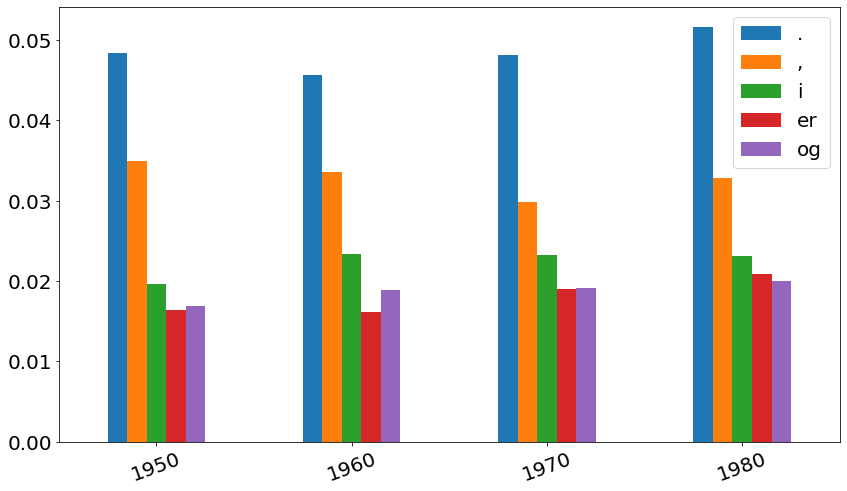

In [64]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [67]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
Folkeaksjonen, Selvbestemt, Øog, Kvinnefronten, Kvinneaksjonen, Sjølbestemt, Hauglin, Abort, Tungesvik, Folkepartis, SVs, Opplysningsutvalget, Kr.F, Korvald, 13.45, Valgforbund, Senterpartiets, 19.15, Provosert, Aksjonen, Folkepartiet, Dagsnytt, Kvinnefrontens, Brekken, Svindland, Folkeaksjon, Programledere, Unneberg, Benkow, NTB-Reuter, Prevensjon, Fjose, 19.30, Hoyre, Aksjon, Blegen, Senterungdommen, RADIO

## adj
<span style='font-size:1.1em'>selvbestemt, sjølbestemt, abortsøkende, ufødte</span>
## verb
<span style='font-size:1.1em'>aborter, programfestet, innvilges, innvilge, programfeste, framkalt, legalisere</span>
## unknown
<span style='font-size:1.1em'>sjølvbestemt, sjølvvald, prevensjonsveiledning, abortspørsmålet, svangerskapsavbrytelse, soke, abortsaken, fosterets, svangerskapets, svangerskapsuke, sjolbestemt, sjølvald, stortingsperiode, soker, sporsmålet, soknader, abortdebatten, abortinngrep, abortlovgivningen, utfore, provocatus, sokte, sporsmål, sterilisering, kvinnerett, losning, reservasjonsrett, abortus, abortnemnda, sjolvvald</span>
## subst
<span style='font-size:1.1em'>abortlov, abortloven, folkeaksjonen, prevensjonsmiddel, daghjem, nødløsning, pornografi, kvinnesak, menneskeverdet, prevensjonsmidler, programpost, svangerskapsavbrudd, underskrifter, programposten, seksualopplysning, folkeaksjon, fosterdrap, porno, forkjemperne, sterilitet, familieplanlegging</span>


# Hvordan utvikler ordene seg?

In [72]:
barchart = lambda w, title='', df=pmi: df.loc[[ws for ws in w if ws in df.index]].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

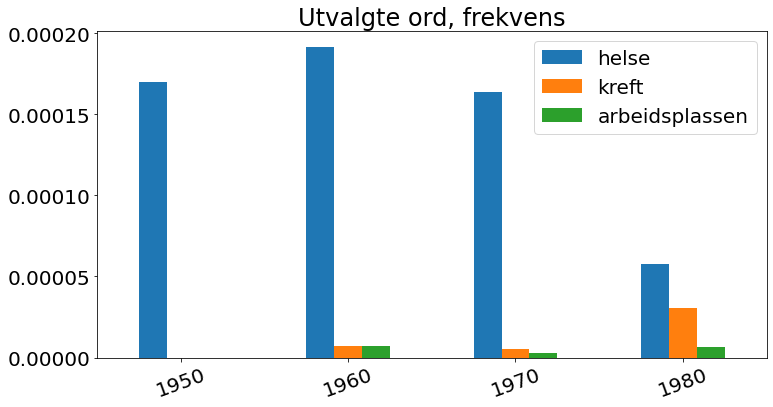

In [73]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

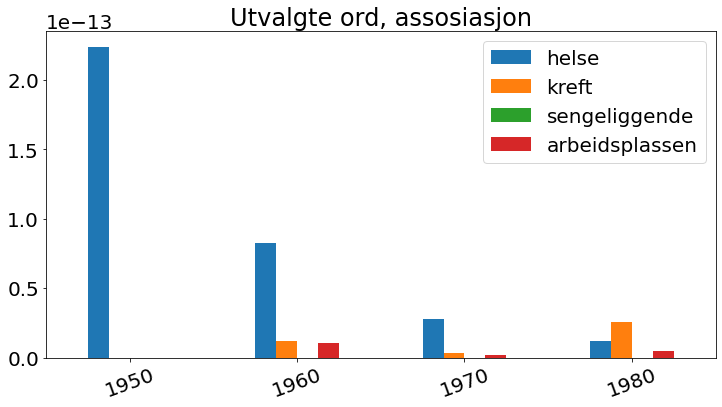

In [74]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

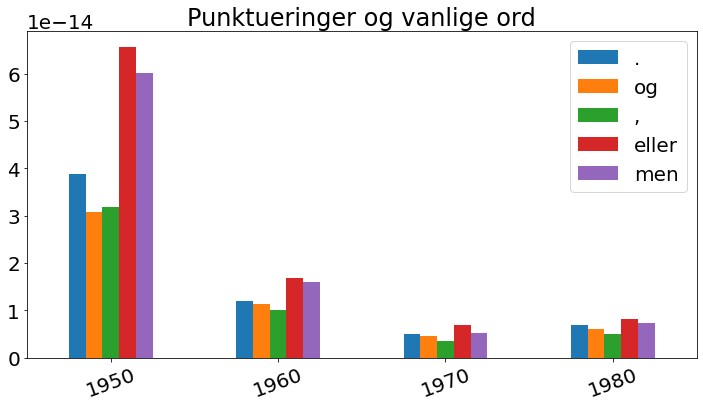

In [75]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

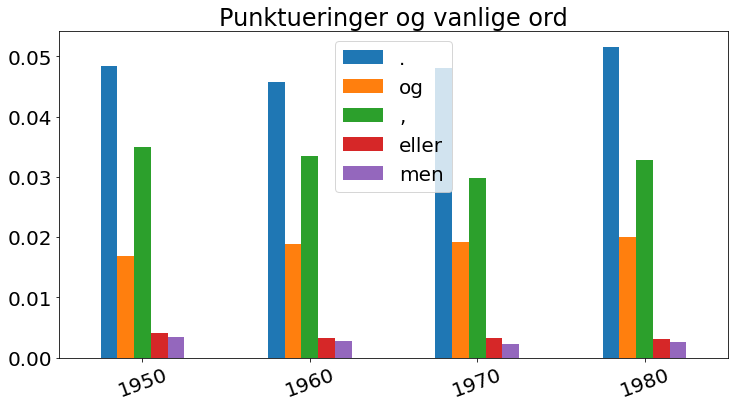

In [76]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [77]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

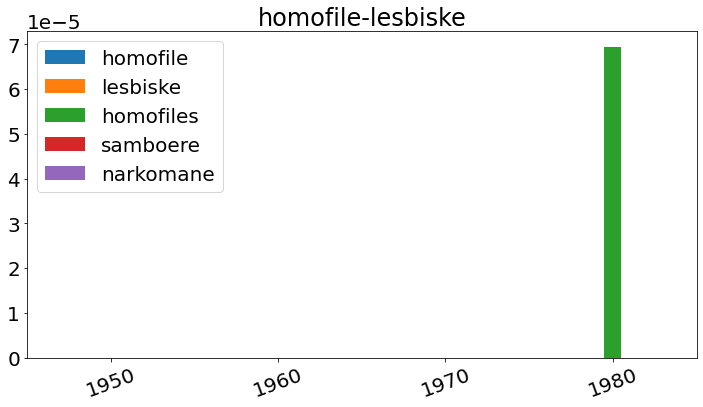

In [78]:
commchart(2, (0,5));

<AxesSubplot:title={'center':'prevensjon-familieplanlegging'}>

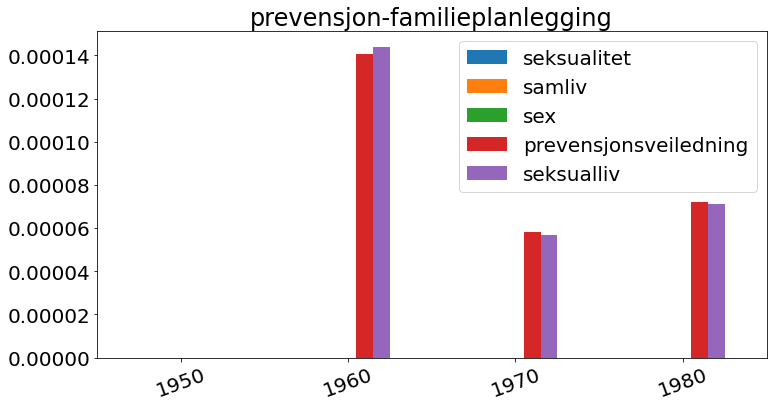

In [79]:
commchart(1, (3, 8))

<AxesSubplot:title={'center':'homofili-homofilt'}>

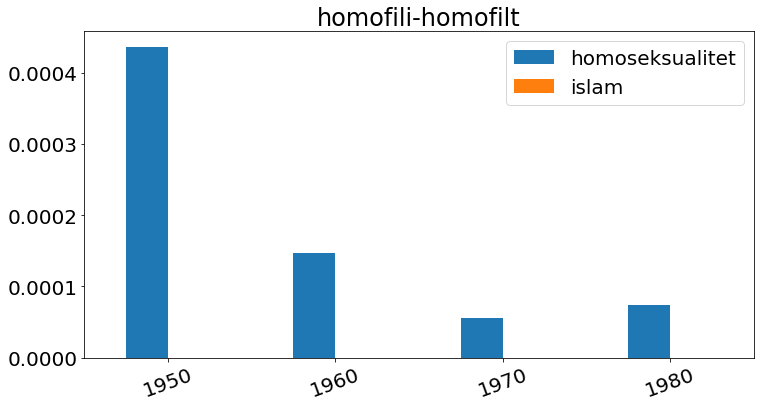

In [81]:
commchart(3, (3, 8))

<AxesSubplot:title={'center':'homofili-homofilt'}>

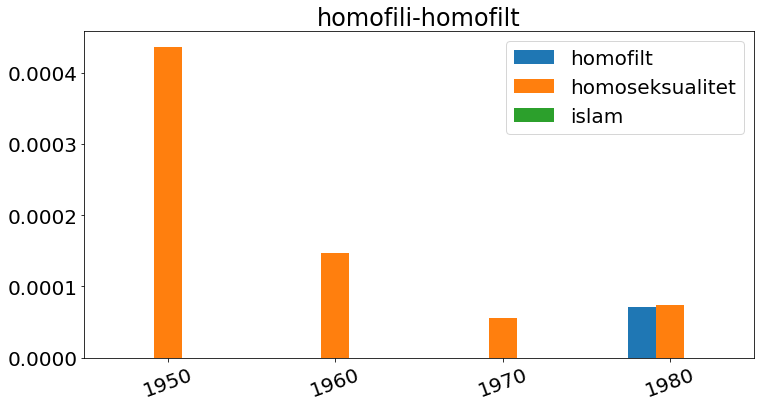

In [80]:
commchart(3)